# Exploratory data analysis

In [61]:
import pandas as pd
from datetime import timedelta

data = pd.read_json('data.json', convert_dates=True)

data

,event,start,end,amount,notes
0,sleep,2021-01-01 00:00:00,2021-01-01 04:00:00,NaN,NaN
1,feed,2021-01-01 04:00:00,NaN,120.0,NaN
2,nappy,2021-01-01 04:10:00,NaN,NaN,"pee,medium"
3,sleep,2021-01-01 04:30:00,2021-01-01 08:10:00,NaN,NaN
4,sleep,2021-01-01 12:30:00,2021-01-01 13:10:00,NaN,NaN
5,sleep,2021-01-01 20:30:00,2021-01-01 23:59:59,NaN,NaN
6,sleep,2021-01-02 00:00:00,2021-01-02 04:00:00,NaN,NaN
7,feed,2021-01-02 04:00:00,NaN,120.0,NaN
8,nappy,2021-01-02 04:10:00,NaN,NaN,"poo,pee,large"
9,sleep,2021-01-02 04:30:00,2021-01-02 08:10:00,NaN,NaN


# Data clean up - filling end dates, adding more columns (e.g. day)

In [62]:
data['start'] = pd.to_datetime(data.start, format='%Y-%m-%d %H:%M:%S')
data['end'] = data.end.fillna(data.start + timedelta(minutes=5))
data['end'] = pd.to_datetime(data.end, format='%Y-%m-%d %H:%M:%S')

# We use these two values to plot to our broken horizontal bar graph - we use minutes to normalise
data['delta_start'] = data.start.dt.minute + (data.start.dt.hour * 60)
data['delta_end'] = data.end.dt.minute + (data.end.dt.hour * 60) - data.delta_start


data['day'] = data.start.dt.floor('d')
data


,event,start,end,amount,notes,delta_start,delta_end,day
0,sleep,2021-01-01 00:00:00,2021-01-01 04:00:00,NaN,NaN,0,240,2021-01-01
1,feed,2021-01-01 04:00:00,2021-01-01 04:05:00,120.0,NaN,240,5,2021-01-01
2,nappy,2021-01-01 04:10:00,2021-01-01 04:15:00,NaN,"pee,medium",250,5,2021-01-01
3,sleep,2021-01-01 04:30:00,2021-01-01 08:10:00,NaN,NaN,270,220,2021-01-01
4,sleep,2021-01-01 12:30:00,2021-01-01 13:10:00,NaN,NaN,750,40,2021-01-01
5,sleep,2021-01-01 20:30:00,2021-01-01 23:59:59,NaN,NaN,1230,209,2021-01-01
6,sleep,2021-01-02 00:00:00,2021-01-02 04:00:00,NaN,NaN,0,240,2021-01-02
7,feed,2021-01-02 04:00:00,2021-01-02 04:05:00,120.0,NaN,240,5,2021-01-02
8,nappy,2021-01-02 04:10:00,2021-01-02 04:15:00,NaN,"poo,pee,large",250,5,2021-01-02
9,sleep,2021-01-02 04:30:00,2021-01-02 08:10:00,NaN,NaN,270,220,2021-01-02


# Visualisation

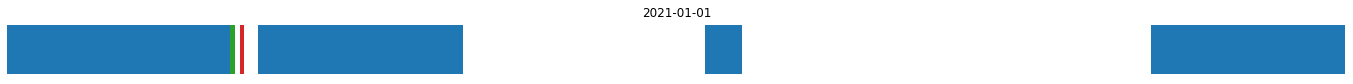

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(24,1))

def plot_day(day, ax):
  ax.axis('off')
  day_to_plot = data[data['day'] == day]

  sleep = day_to_plot[day_to_plot['event'] == 'sleep']
  feed = day_to_plot[day_to_plot['event'] == 'feed']
  nappy = day_to_plot[day_to_plot['event'] == 'nappy']


  zl = list(zip(sleep.delta_start, sleep.delta_end))
  fl = list(zip(feed.delta_start, feed.delta_end))
  nl = list(zip(nappy.delta_start, nappy.delta_end))

  ax.set_title(day)
  ax.broken_barh(zl, (0, 10), facecolors='tab:blue')
  ax.broken_barh(fl, (0, 10), facecolors='tab:green')
  ax.broken_barh(nl, (0, 10), facecolors='tab:red')
  ax.grid(False)

  ax.set_xticklabels([])
  ax.set_yticklabels([])

  ax.set_xlim(0, 1440)

plot_day('2021-01-01', ax)